In [107]:
from skimage import io
import matplotlib.pylab as plt
import numpy as np
from skimage.draw import line_nd
from skimage.util import img_as_float

filename = "./images/Kropka.jpg"
test = io.imread(filename, as_gray=True)
test = img_as_float(test)

In [114]:
def radon_transform(image, scans = 360, detectors = 180, detectors_angular_span = 180, step = 1):
    image_center = (image.shape[0] // 2, image.shape[1] // 2)
    image_radius = max(image_center) * np.sqrt(2)

    radon_image = np.zeros((scans, detectors), dtype=image.dtype)

    detectors_angle = np.deg2rad(detectors_angular_span)
    detectors_gap = detectors_angle / (detectors - 1)

    for i in range(scans):
        emiter_angle = np.deg2rad(step * i)
        emiter_pos = (image_radius * np.cos(emiter_angle) + image_center[0], 
                      image_radius * np.sin(emiter_angle) + image_center[1])

        for j in range(detectors):
            detector_pos = (image_radius * (np.cos(emiter_angle + np.pi - detectors_angle / 2 + j * detectors_gap)) + image_center[0],
                            image_radius * (np.sin(emiter_angle + np.pi - detectors_angle / 2 + j * detectors_gap)) + image_center[1])
            
            y, x = line_nd(emiter_pos, detector_pos, endpoint=True)
            
            valid_mask = (y >= 0) & (y < image.shape[0]) & (x >= 0) & (x < image.shape[1])
            line = (y[valid_mask], x[valid_mask])

            if len(line[0]) > 0:
                radon_image[i, j] = np.average(image[line])
            else:
                radon_image[i, j] = 0

    return radon_image

C:\Users\kasia\AppData\Local\Temp\ipykernel_8588\1799829369.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(radon_transform(test, scans=360, detectors=360, detectors_angular_span=180), cmap='gray')


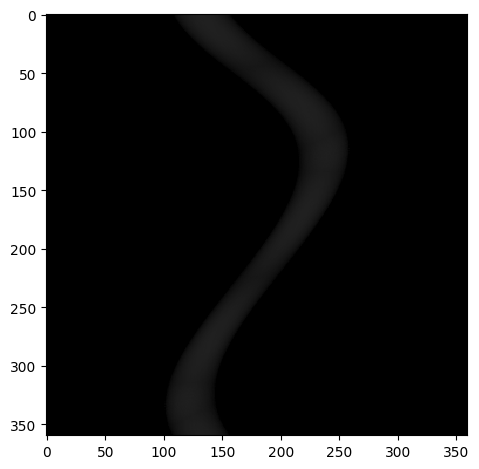

In [ ]:
io.imshow(radon_transform(test, scans=360, detectors=360, detectors_angular_span=180), cmap='gray')